In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Punto 1 (25%)

¿Ha jugado alguna vez el emblematico batalla naval? Si la respuesta es no, le recomiendo que lo juegue, es un juego muy entretenido. Si la respuesta es sí, entonces sabrá que el juego consiste en adivinar la posición de los barcos del oponente. En este punto, usted deberá de crear la imagen de un tablero de batalla naval de 50x50, en el cual se encuentran cinco (5) barcos de diferentes tamaños.
<Br>
Requisitos:
<ul>
    <li>Los barcos deben de ser de color blanco.</li>
    <li>La imagen se divide en cuatro (4) cuadrantes.</li>
    <li>Cada cuadrante debe de tener mínimo un (1) barco.</li>
    <li>Deben de existir barcos en posición vertical y horizontal</li>
    <li>El color base del tablero es negro</li>
    <li>¡Oh, que desastre! El cuadrante tres (3) se ha llenado de sangre de nuestros valientes guerreros, ahora su color es RGB (139,0,0)</li>
    <li>El cuadrante dos (2) no se salva de esta lista de desgracias, al parecer hay residuos radiactivos dentro de la zona. El color de este cuadrante es RGB (40,233,40)</li>
</ul>
Dimensiones de los barcos (largo x ancho):
<ol>
    <li>(3x2)</li>
    <li>(2x2)</li>
    <li>(4x2)</li>
    <li>(1x2)</li>
    <li>(8x2)</li>
</ol>
El resultado esperado es el tablero de batalla naval

Board shape: (50, 50)
Boat shape: (3, 2)
Boat shape: (2, 2)
Boat shape: (2, 4)
Boat shape: (2, 1)
Boat shape: (8, 2)


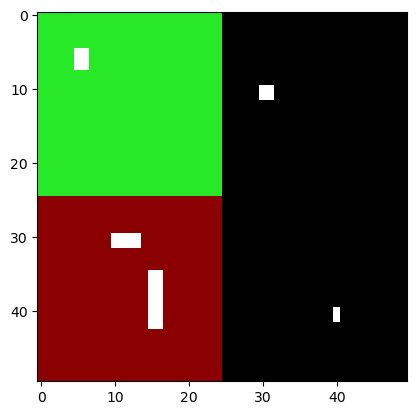

In [2]:
# Creamos una matriz 3D de 50x50 con 3 canales usando numpy, inicializada a cero para representar el tablero (negro)
board = np.zeros((50, 50, 3), dtype=np.uint8)
print(f'Board shape: {board.shape[:2]}')

# Definimos un diccionario de colores en formato RGB
colors = {
    'white': (255, 255, 255),
    'blood': (139, 0, 0),
    'radioactive': (40, 233, 40),
}

# Definimos un diccionario con las medidas del tablero (medidas de interes usadas para representar los cuandrantes del tablero)
board_measures = {
    '(1/2)x': board.shape[1] // 2,
    '(1/2)y': board.shape[0] // 2,
    'x': board.shape[1],
    'y': board.shape[0],
    '0': 0
    }

# Definimos un diccionario con las medidas de los barcos (medidas dadas en el problema)
boat_measures = {
    'boat1': {'length': 3, 'width': 2},
    'boat2': {'length': 2, 'width': 2},
    'boat3': {'length': 4, 'width': 2},
    'boat4': {'length': 1, 'width': 2},
    'boat5': {'length': 8, 'width': 2},
}

# Pintamos los cuandrantes que el ejercicio del tablero con los colores definidos anteriormente

# Cuandrante tres
board[board_measures['(1/2)y']:board_measures['y'], board_measures['0']:board_measures['(1/2)x']] = colors['blood']
# Cuandrante dos
board[board_measures['0']:board_measures['(1/2)y'], board_measures['0']:board_measures['(1/2)x']] = colors['radioactive']

# Se define una función para dibujar un barco en el tablero
def draw_boat(x, y, length, width, vertical=False):
    if vertical: # Si el barco es vertical
        # Se pinta el barco en el tablero con el color blanco en las coordenadas dadas (de forma vertical)
        board[x:x+length, y:y+width] = colors['white']
        print(f'Boat shape: {board[x:x+length, y:y+width].shape[:2]}')
    else: # Si el barco es horizontal
        # Se pinta el barco en el tablero con el color blanco en las coordenadas dadas (de forma horizontal)
        board[x:x+width, y:y+length] = colors['white']
        print(f'Boat shape: {board[x:x+width, y:y+length].shape[:2]}')

# Dibujamos los barcos en el tablero utilizando las medidas de estos
draw_boat(5, 5, boat_measures['boat1']['length'], boat_measures['boat1']['width'], vertical = True)
draw_boat(10, 30, boat_measures['boat2']['length'], boat_measures['boat2']['width'])
draw_boat(30, 10, boat_measures['boat3']['length'], boat_measures['boat3']['width'])
draw_boat(40, 40, boat_measures['boat4']['length'], boat_measures['boat4']['width'])
draw_boat(35, 15, boat_measures['boat5']['length'], boat_measures['boat5']['width'], vertical = True)

# Mostramos el tablero utilizando matplotlib
plt.imshow(board)
plt.show()

## Punto 2 (20%)

La imagen "res/punto2.png" tiene problemas de luminosidad, tu trabajo será aumentar en un 40% la luminosidad de la imagen. En su trabajo final se enfrentará a casos en donde la imagen no presente el brillo suficiente, ocasionando que el objeto de estudio no se pueda examinar de la mejor manera.
<br>
Debes de entregar cuatro (4) partes: La imagen original, el histograma original, la imagen modificada y el histograma modificado
<br>
PD: La imagen original y la imagen modificada deben de ser RGB.

### Explicación

Para aumentar la luminosidad, podríamos simplemente multiplicar cada espacio de color de la imagen por $1.4$, con esto, se lograría estirar el histograma, dando así la sensación de que la imagen adquirió más luminosidad, pero al hacer esto ocurriría un efecto de *wrapping*, donde se mostrarían artefactos indeseados en la imagen. Por tanto, se define una función que realiza una transformación lineal donde con ayuda de una función de numpy se puede definir los limites mínimos y máximos de los valores de los píxeles en la imágen.

Lo demás es "carpintería", como leer la imagen correctamente en RGB, además de mostrar los gráficos y las imagenes en subplots adecuados.

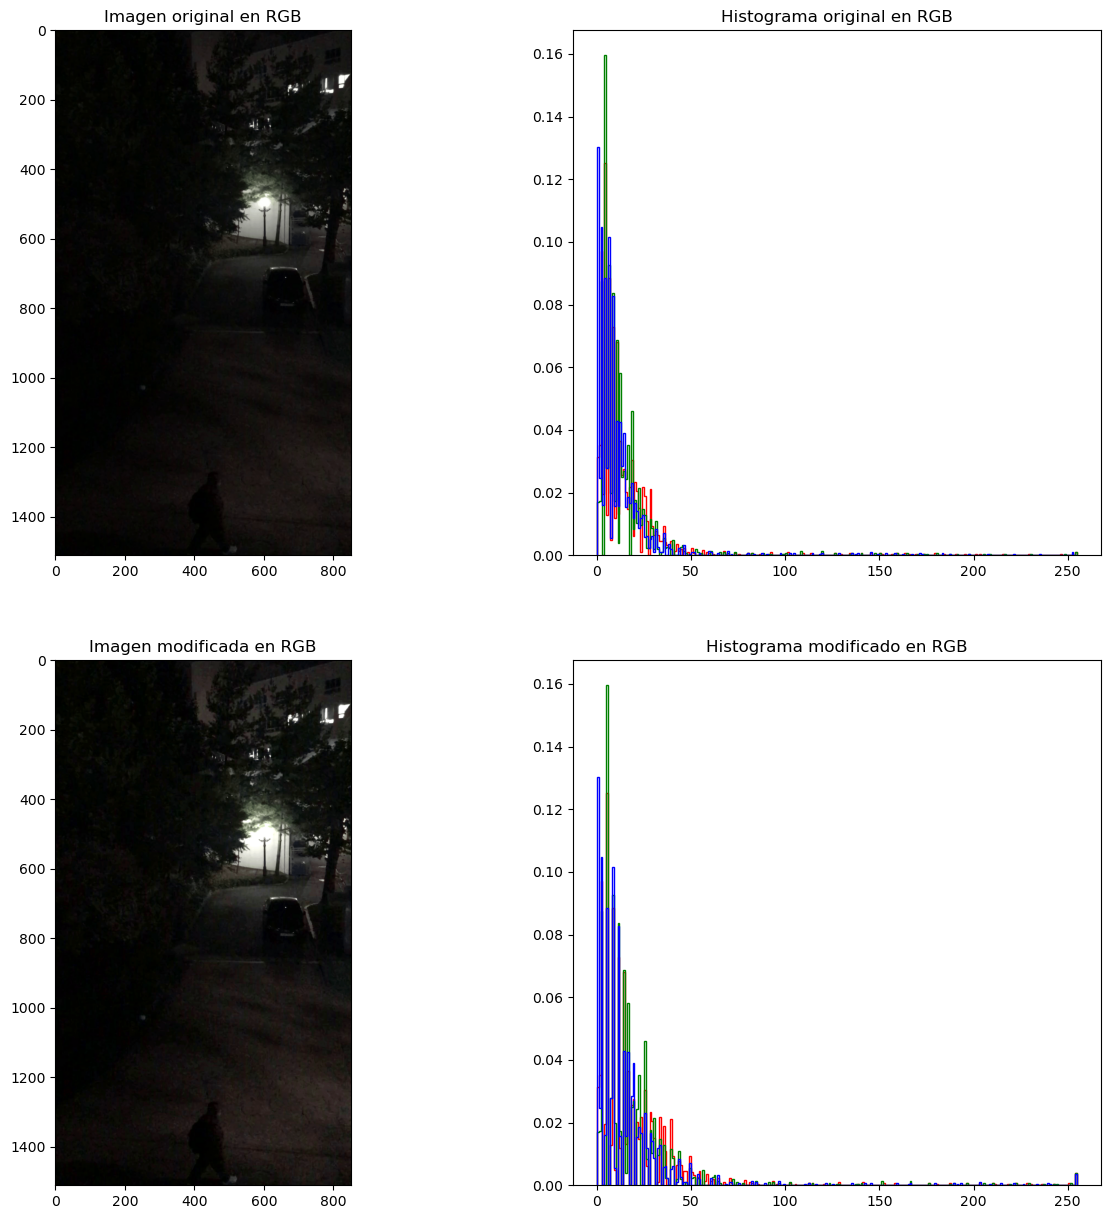

In [3]:
def linear_transform_color(img, a, b):
    """
    Aplica una transformación lineal a una imagen en color.

    Parámetros:
    img : numpy.ndarray
        La imagen de entrada en formato de matriz numpy (deben ser valores
        de píxeles en el rango [0, 255]).

    a : float
        El coeficiente de escala para la transformación lineal.

    b : float
        El término de desplazamiento para la transformación lineal.

    Retorna:
    numpy.ndarray
        La imagen transformada con la transformación lineal aplicada.
        Los valores de píxeles se limitan al rango [0, 255] después
        de la transformación.
    """
    # Aplicar la transformación lineal a la imagen
    transformed_img = img * a + b
    # Limitar los valores resultantes dentro del rango válido (0-255)
    transformed_img = np.clip(transformed_img, 0, 255)
    return transformed_img.astype(np.uint8)

# Leer la imagen
img_original = cv2.cvtColor(cv2.imread("res/punto2.png"), cv2.COLOR_BGR2RGB)

# Aumentar la luminosidad en un 40%
img_original_div = linear_transform_color(img_original, 1.4, 0)

# Crea una figura con cuatro subgráficos dispuestos en una cuadrícula de 2x2
# con un tamaño de 15x15 pulgadas.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# Define una lista de colores para los canales RGB
colors = ('r', 'g', 'b')

# Configura el título y muestra la imagen original en el primer subgráfico
ax1.set_title('Imagen original en RGB')
ax1.imshow(img_original)

# Configura el título y crea un histograma para cada
# canal de la imagen original en el segundo subgráfico
for i, col in enumerate(colors):
    img_array_i = img_original[:, :, i].ravel()
    ax2.hist(img_array_i, histtype='step', bins=255,
             range=(0.0, 255.0), density=True, color=colors[i])

ax2.set_title('Histograma original en RGB')

# Configura el título y muestra la imagen modificada en el tercer subgráfico
ax3.set_title('Imagen modificada en RGB')
ax3.imshow(img_original_div)

# Configura el título y crea un histograma para cada canal
# de la imagen modificada en el cuarto subgráfico
for i, col in enumerate(colors):
    img_array_i = img_original_div[:, :, i].ravel()
    ax4.hist(img_array_i, histtype='step', bins=255,
             range=(0.0, 255.0), density=True, color=colors[i])

ax4.set_title('Histograma modificado en RGB')

# Muestra la figura con los subgráficos
plt.show()

## Punto 3 (10%)

### Objeto de estudio: Bananos (res/punto3.png)

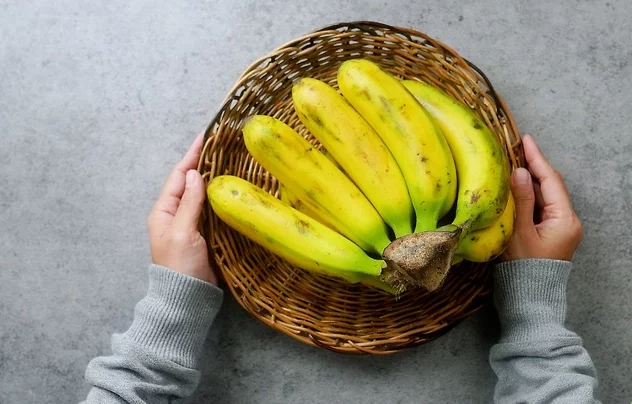

In [4]:
Image("res/punto3.png")

### A (2.5%)
Describir el entorno y las condiciones de iluminación que pueden afectar las condiciones de la imagen

**En términos de iluminación, la imagen cuenta con una buena condición en este aspecto. En cuanto al entorno, aquello que más podría dificultar la lectura correcta del objeto que queremos estudiar sería la canasta y las manos que la sostienen, puesto que interfieren directamente en el contacto con el objeto de estudio (en este caso, las bananas).**

### B (2.5%)
Analizar el histograma de la imagen para observar la distribución de las intensidades de los píxeles y su relación con las características visuales del objeto y el entorno.

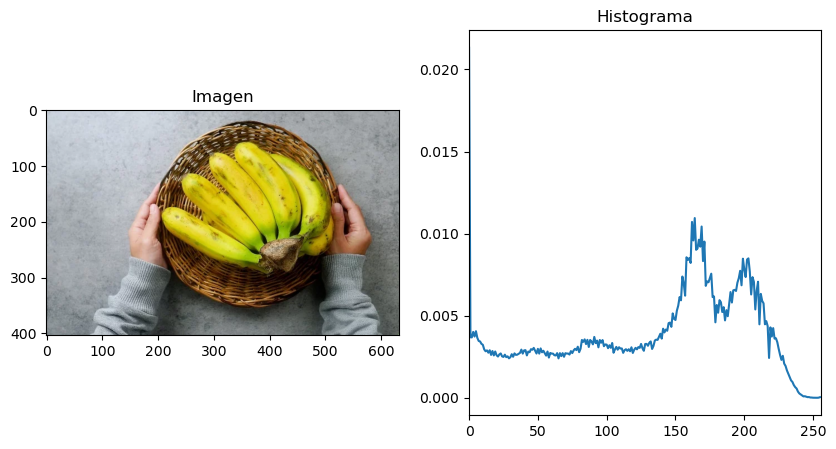

In [5]:
# Leemos la imagen y la convertimos a RGB

img3 = cv2.imread("res/punto3.png",cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

# Creamos el hisograma correspondiente, de tamaño 1x2, 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img3, cmap = "gray")
ax1.set_title('Imagen')

hist, bins = np.histogram(img3.ravel(), 256, [0, 256], density= True)

ax2.plot(hist)
ax2.set_title('Histograma')
ax2.set_xlim([0, 256])

plt.show()


**Como se describió anteriormente, en este histograma podemos evidenciar que la imagen presentada no se caracteriza por su baja iluminación, puesto que no se ve una gran cantidad de pixeles con valores bajos, por el contrario,  los valores claros predominan en esta imagen.**

### C (2.5%)
Estudiar el espacio de color de la imagen, con el objetivo de identificar en qué canales se puede distinguir mejor el objeto de estudio. Seleccionar los canales de color candidatos donde se identifique mejor el objeto de estudio.


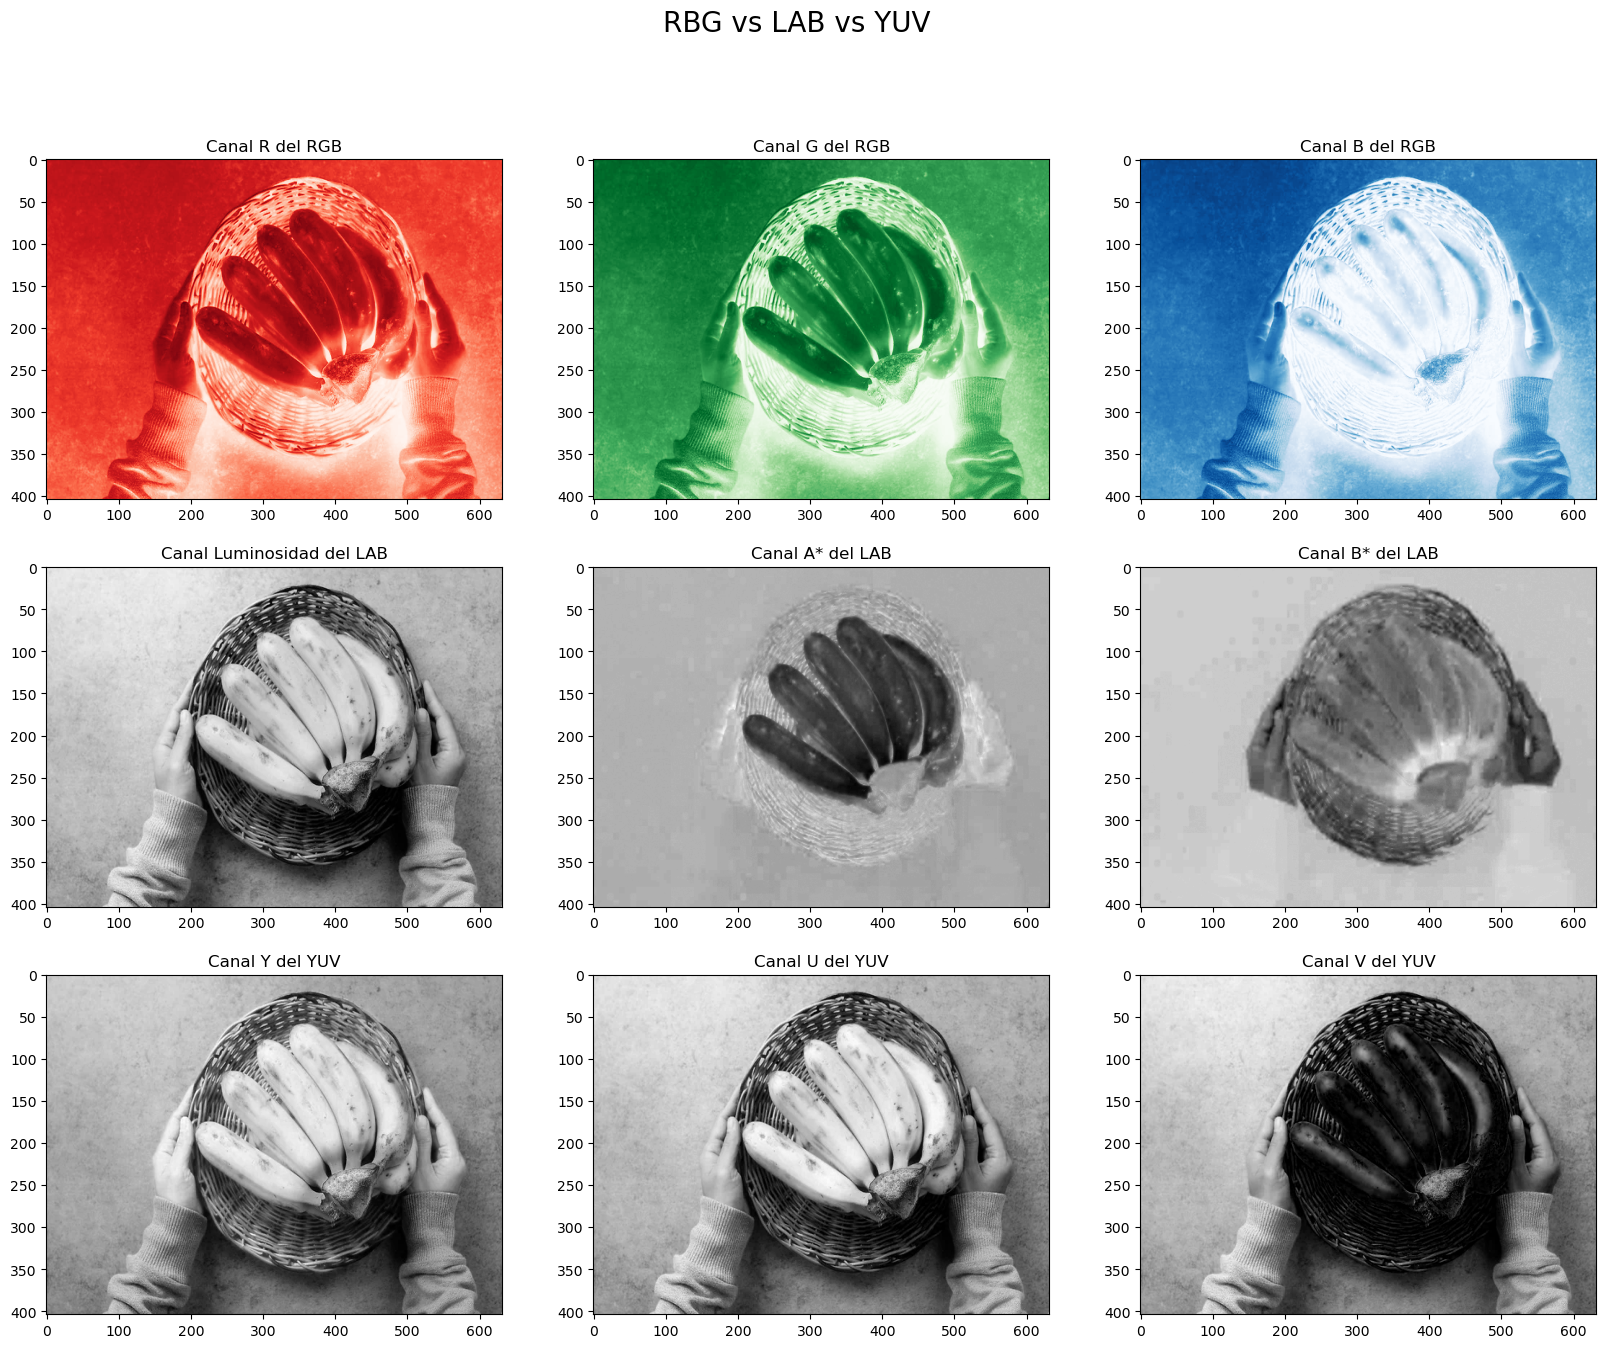

In [6]:
# Creamos copias de la imagen original, para evitar modificaciones erróneas
imgC = img3.copy()
imgLab = img3.copy()
imgYuv = img3.copy()

# Convertimos la imagen a formato LAB
imgLab = cv2.cvtColor(imgLab,cv2.COLOR_BGR2LAB)

imgL = imgLab[:,:,0]
imgA = imgLab[:,:,1]
imgB = imgLab[:,:,2]

# Asignamos los valores RGB
imgCred = imgC[:,:,0]
imgCgreen = imgC[:,:,1]
imgCblue = imgC[:,:,2]

# Asignamos los valores YUV
imgY = imgYuv[:,:,0]
imgU = imgYuv[:,:,1]
imgV = imgYuv[:,:,2]

# Presentamos cada valor de cada canal en diferentes plots


fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize = (20,15))
fig.suptitle('RBG vs LAB vs YUV', fontsize=20)

ax1.set_title('Canal R del RGB')
ax1.imshow(imgCred, cmap='Reds', aspect='auto')

ax2.set_title('Canal G del RGB')
ax2.imshow(imgCgreen, cmap='Greens', aspect='auto')

ax3.set_title('Canal B del RGB')
ax3.imshow(imgCblue, cmap='Blues', aspect='auto')

ax4.set_title('Canal Luminosidad del LAB')
ax4.imshow(imgL, cmap='gray', aspect='auto')
ax5.set_title('Canal A* del LAB')
ax5.imshow(imgA, cmap='gray', aspect='auto')
ax6.set_title('Canal B* del LAB')
ax6.imshow(imgB, cmap='gray', aspect='auto')

ax7.set_title('Canal Y del YUV')
ax7.imshow(imgY, cmap='gray', aspect='auto')
ax8.set_title('Canal U del YUV')
ax8.imshow(imgU, cmap='gray', aspect='auto')
ax9.set_title('Canal V del YUV')
ax9.imshow(imgV, cmap='gray', aspect='auto')

### D (2.5%)
Seleccionar el canal de color donde se identifique mejor el objeto de estudio.

## Punto 4 (25%)

Hay una forma muy interesante de expandir el histograma de una imagen, y es mediante la normalización de la imagen. En este punto, usted deberá de normalizar la imagen "res/punto4x.png" y entregar los siguientes puntos:
<ul>
    <li>La imagen original con su respectivo histograma</li>
    <li>La imagen modificada con su respectivo histograma</li>
</ul>
La ecuación de normalización es la siguiente:
<br>

$
f(g)=\frac{(g-m)*255}{(M-m)}
$
<br>
<br>
Donde g se refiere al valor del pixel (imagen), M se refiere al valor máximo de la imagen y m se refiere al valor mínimo de la imagen.
<br>
PD: Esta ecuación se debe aplicar sobre los tres (3) canales de color de la imagen.

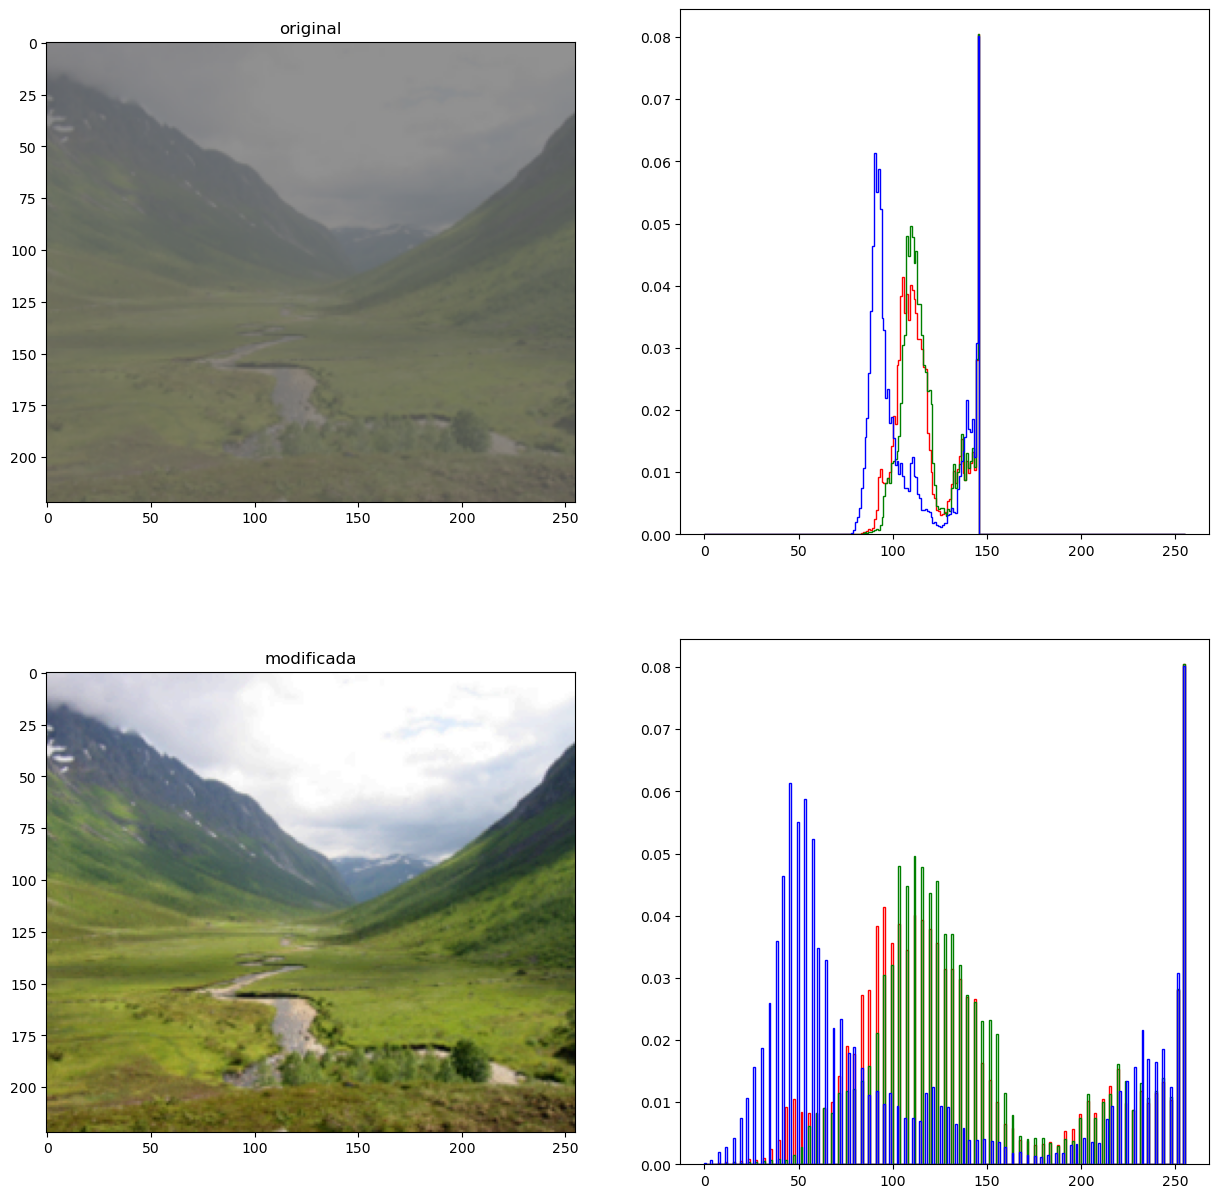

In [7]:
Image("res/punto4x.png")

#trabajamos con el espacio de color RGB
img_color=cv2.cvtColor(cv2.imread("res/punto4x.png"), cv2.COLOR_BGR2RGB)
# Denomiamos minimos y maximos
min_val = np.min(img_color, axis=(0, 1))#m valor mínimo del pixel
max_val = np.max(img_color, axis=(0, 1))#M valor máximo del pixel

"""Esta funcion se usa poruq enos permite crear una copia de nuestra imagen
#orignal con valor en ceros, la cual se le aplica operaciones y tomaran los valores
#normalizados que establezcamos."""

img_modificada=np.zeros(img_color.shape,dtype=np.uint8)

"""Definimos los canales que utilizaremos en nuestros histogramas
 para visuzalizar como estos estan distribuidos"""

colores=("r","g", "b")

"""Se realiza la normalizacion a cada canal y se usa la funcion subplot para tener
una visualización completa de las imagenes y los histogramas"""
for i in range(3):
    img_modificada[:,:,i]=(img_color[:,:,i] - min_val[i]) * (255.0 / (max_val[i] - min_val[i]))

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2, figsize=(15,15))
ax1.imshow(img_color)
ax1.set_title("original")

for i,col in enumerate(colores):
    paisaje_array_i=img_color[:,:,i].ravel()
    ax2.hist(paisaje_array_i,histtype="step",bins=255,range=(0.0, 255.0), density=True, color=colores[i])

ax3.imshow(img_modificada)
ax3.set_title("modificada")

for i,col in enumerate(colores):
    paisaje_array_i=img_modificada[:,:,i].ravel()
    ax4.hist(paisaje_array_i,histtype="step",bins=255,range=(0.0, 255.0), density=True, color=colores[i])


ANALISIS DE HISTOGRAMA

Como se puede observar en el histograma de nuestra imagen orignal la distribusión
de los pixeles es uniforme en cuanto al color, pero el brillo de la imagen
es poco, ya que nuestros pixeles estan distrubidos en la mitad, por esta razón se le aplica
un operador lineal con el objetivo de aclarar nuestra imagen y
esto se refleja en el espaciamiento de nuestros pixeles,
permitiendo asi que estos se distibuyan a la derecha y como consecuncia se obtenga una imagen iluminada


## Punto 5 (20%)

Este punto es acerca del avance del proyecto final. Se requiere que presente una descripción del dataset, en donde incluya los siguientes puntos:
<ol>
    <li>La fuente del dataset</li>
    <li>La cantidad de imagenes que hay en el dataset</li>
    <li>¿Qué diferencias puede encontrar en cada imagen?</li>
    <li>¿Qué ventajas da usar este dataset para este proyecto?</li>
</ol>
Además de este análisis, enumere las preguntas a responder con este proyecto, para la aplicación seleccionada.

### Solución
1. La fuente del dataset usado, es la prueba comparativa alemana de reconocimiento de señales de tráfico (GTSRB), por sus siglas en inglés.

Breve resumen del dataset GTSRB
[GTSRB](https://paperswithcode.com/dataset/gtsrb#:~:text=GTSRB%20(German%20Traffic%20Sign%20Recognition%20Benchmark)&text=The%20German%20Traffic%20Sign%20Recognition,light%20conditions%20and%20rich%20backgrounds.)

Además se puede encontrar en kaggle en el siguiente link.
[GTSRB Kaggle](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

2. contiene 43 clases de señales de tráfico, divididas en 39.209 imágenes de entrenamiento y 12.630 imágenes de prueba.

3. En cuanto a las diferencias, las imágenes presentan distintas condiciones de iluminación y fondos, además de diferenciaciones en los ángulos al tomar las fotos.

4. Las ventajas que tenemos con este dataset es que contamos con  43 clases diferentes de señales de tráfico. El conjunto de datos abarca una amplia variedad de situaciones y tipos de señales, lo que le permitirá al modelo reconocer una gama extensa de señales de tráfico.También la presencia de distintas condiciones de iluminación y fondos en las imágenes ayudará a que el modelo se vuelva más robusto ante variaciones del entorno, lo que puede simular situaciones del mundo real y, por último, tenemos el tamaño del conjunto de datos, donde con 39,209 imágenes de entrenamiento y 12,630 imágenes de prueba, el conjunto de datos es lo suficientemente grande como para permitir un entrenamiento robusto. Un conjunto de datos grande generalmente mejora la capacidad del modelo para generalizar a nuevas situaciones.

### Preguntas que se podrán responder con este proyecto

**Automatización del transporte**: Con el avance hacia la conducción autónoma y la tecnología de asistencia al conductor, es necesario que los vehículos sean capaces de reconocer y comprender las señales de tránsito por sí mismos. Los sistemas de clasificación de señales de tránsito son componentes clave para lograr esta automatización, permitiendo que los vehículos interpreten y respondan adecuadamente a las señales en tiempo real.

**Enseñanza de las señales de tráfico**: Debido a que se realizará una inteligencia artificial con la capacidad de clasificar, será bastante útil para responder a preguntas sobre estas en la vía, ayudando a conductores inexpertos a manejarse por la carretera.